<a href="https://colab.research.google.com/github/Malick31/Projet-ML_IMAGE-M2/blob/main/ProjetML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ## Louzar- Ouniss-Sakho  M2-MAPI3

```



```



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

from keras.models import load_model
from tensorflow.keras.optimizers import Adam 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Ouverture du ficher

In [3]:
lead_order = ["DI", "DII", "DIII", "AVL", "AVF", "AVR", "V1", "V2", "V3", "V4", "V5", "V6"]

path = '/content/drive/MyDrive'

df_goldStandard = pd.read_csv(f'{path}/data/annotations/gold_standard.csv')
df_goldStandard['nb_abnormality'] =  df_goldStandard.sum(axis=1)


In [4]:
df_goldStandard.head(8)
# On affiche les 8 premiers éléments du tableau afin de voir son contenu 
# goldStandar est obtenu lorsque le cardiologist 1 et 2 font le même diagnostic

1dAVb  RBBB  LBBB  SB  AF  ST  nb_abnormality
0      0     0     0   0   0   0               0
1      0     0     1   0   0   0               1
2      0     0     0   0   0   0               0
3      0     0     0   0   0   0               0
4      0     0     0   0   0   0               0
5      0     0     0   0   0   0               0
6      0     0     0   0   0   0               0
7      0     0     0   0   0   0               0

In [5]:
df_goldStandard.describe()

1dAVb        RBBB        LBBB          SB          AF          ST  \
count  827.000000  827.000000  827.000000  827.000000  827.000000  827.000000   
mean     0.033857    0.041112    0.036276    0.019347    0.015719    0.044740   
std      0.180971    0.198670    0.187088    0.137825    0.124463    0.206858   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       nb_abnormality  
count      827.000000  
mean         0.191052  
std          0.428712  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          2.000000

In [6]:
df_goldStandard.nb_abnormality.value_counts()

0    681
1    134
2     12
Name: nb_abnormality, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97a657c450>]],
      dtype=object)

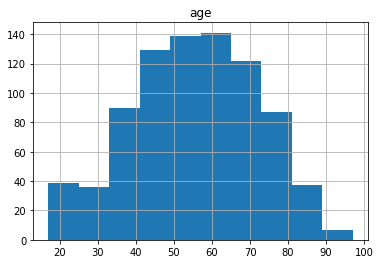

In [7]:
df_attributes = pd.read_csv(f'{path}/data/attributes.csv')
df_attributes
df_attributes.hist()

# age et sexe des patients

Tracé des ECG pour l'étude réalisé

In [8]:
print(df_goldStandard.shape)
display(df_goldStandard.head(20).T)
with h5py.File(f'{path}/data/ecg_tracings.hdf5', "r") as f:
  x = np.array(f['tracings'])
print(x.shape)

(827, 7)


0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  \
1dAVb            0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
RBBB             0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
LBBB             0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
SB               0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
AF               0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
ST               0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
nb_abnormality   0   1   0   0   0   0   0   0   0   0   0   0   1   0   0   

                15  16  17  18  19  
1dAVb            1   0   0   1   0  
RBBB             0   0   0   0   0  
LBBB             1   0   0   1   0  
SB               0   0   0   0   0  
AF               0   0   0   0   0  
ST               0   0   0   0   0  
nb_abnormality   2   0   0   2   0

(827, 4096, 12)


In [9]:
model = load_model(f"{path}/model/model.hdf5", compile=False)
model.compile(loss='binary_crossentropy', optimizer=Adam())

for layer in model.layers:
  print(layer.output_shape)
print(model.summary())

[(None, 4096, 12)]
(None, 4096, 64)
(None, 4096, 64)
(None, 4096, 64)
(None, 4096, 128)
(None, 4096, 128)
(None, 4096, 128)
(None, 4096, 128)
(None, 1024, 64)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 128)
(None, 1024, 196)
(None, 1024, 196)
(None, 1024, 196)
(None, 1024, 196)
(None, 256, 128)
(None, 256, 196)
(None, 256, 196)
(None, 256, 196)
(None, 256, 196)
(None, 256, 196)
(None, 256, 196)
(None, 256, 256)
(None, 256, 256)
(None, 256, 256)
(None, 256, 256)
(None, 64, 196)
(None, 64, 256)
(None, 64, 256)
(None, 64, 256)
(None, 64, 256)
(None, 64, 256)
(None, 64, 256)
(None, 64, 320)
(None, 64, 320)
(None, 64, 320)
(None, 64, 320)
(None, 16, 256)
(None, 16, 320)
(None, 16, 320)
(None, 16, 320)
(None, 16, 320)
(None, 16, 320)
(None, 16, 320)
(None, 5120)
(None, 6)
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape   

In [10]:
import tensorflow as tf
from keras import backend as k


def find_last_conv(model):
  for layer in reversed(model.layers):
    if len(layer.output_shape) == 3:
      return layer.name


def grad_cam(model, time_serie, class_index, relative=True):
 
  
  grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(find_last_conv(model)).output, model.output])
  with tf.GradientTape() as tape:
    inputs = tf.cast([time_serie], tf.float32)
    conv_outputs, predictions = grad_model(inputs)
    loss = predictions[:, class_index]

  grads = tape.gradient(loss, conv_outputs)
  A = np.asarray(conv_outputs[0,:,:])
  dy = np.asarray(grads[0,:,:])
  a_k = dy.mean(axis=0)
  heat_map = np.sum(a_k*A, axis=1)
  heat_map = heat_map * (heat_map>0)
  
  if relative :
    heat_map /= heat_map.max()+1e-6
  return heat_map


In [11]:
from scipy.interpolate import interp1d

def plot_grad_cam_ecg(ts, check_y, selected_leads=True, relatives=True):
  hm = grad_cam(model, ts, check_y, relative=relatives)
  hm_interp = interp1d(np.linspace(0,10.24,16), hm, kind='slinear')
  if selected_leads:
    fig, axs = plt.subplots(1, 3,figsize=(40,5))
    for i,pos in enumerate([1,6,11]):
      ax = axs[i]
      ax.set_title(lead_order[pos],fontsize=10)
      ax.plot(np.linspace(0,10.24,4096),ts[:,pos],'k', linewidth=.5)
      t = ax.scatter(np.linspace(0,10.24,4096),ts[:,pos],linewidths=.1,c=hm_interp(np.linspace(0,10.24,4096)))
    fig.colorbar(t,ax=axs)
    plt.show()
    
  else :
    fig, axs = plt.subplots(4, 3,figsize=(20,16))
    for i in range(12):
      ax = axs[i//3, i%3]
      ax.set_title(lead_order[i],fontsize=10)
      ax.plot(np.linspace(0,10.24,4096),ts[:,pos],'k', linewidth=.5)
      t = ax.scatter(np.linspace(0,10.24,4096),ts[:,pos],linewidths=.1,c=hm_interp(np.linspace(0,10.24,4096)))
    fig.colorbar(t,ax=axs)
    plt.show()

1dAVb 0
RBBB 1
LBBB 2
SB 3
AF 4
ST 5


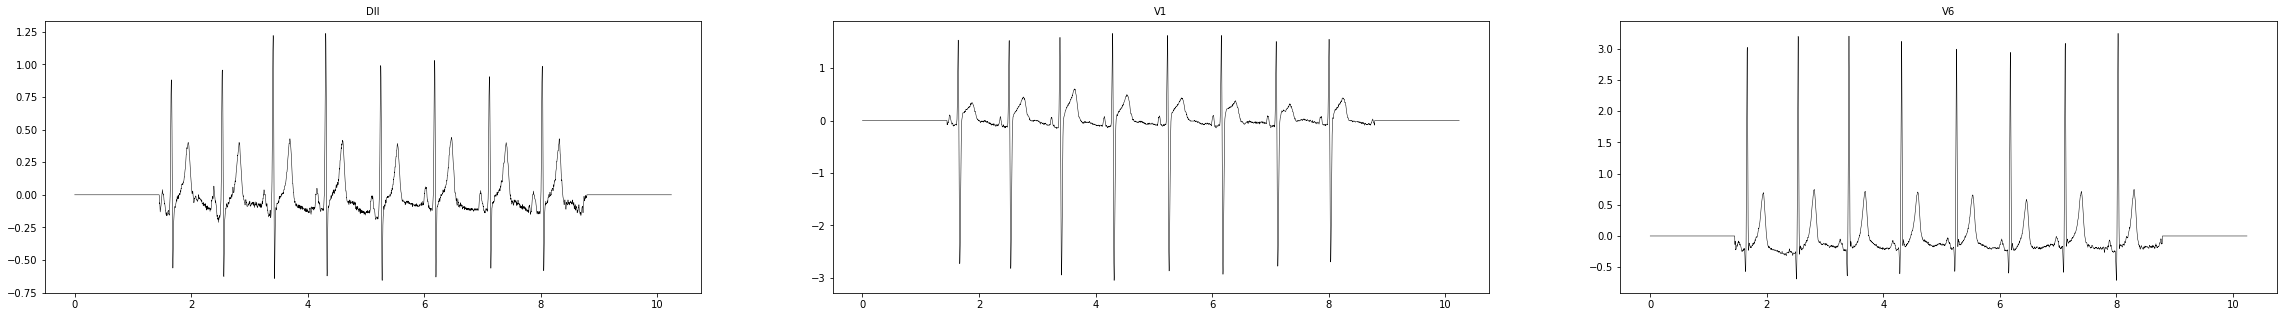

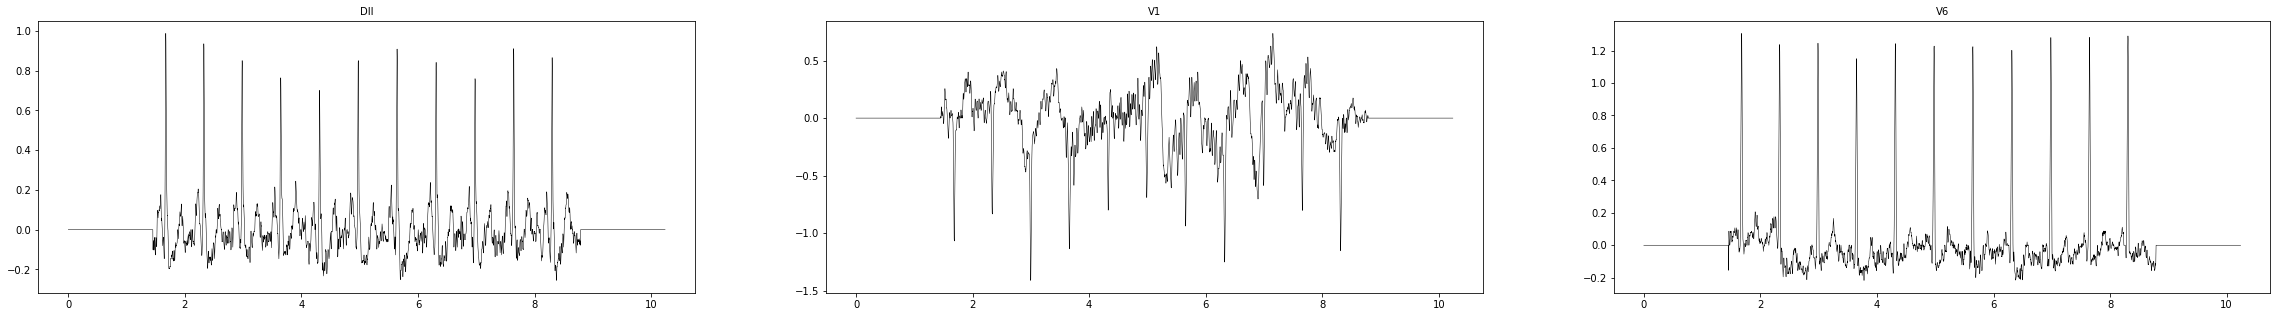

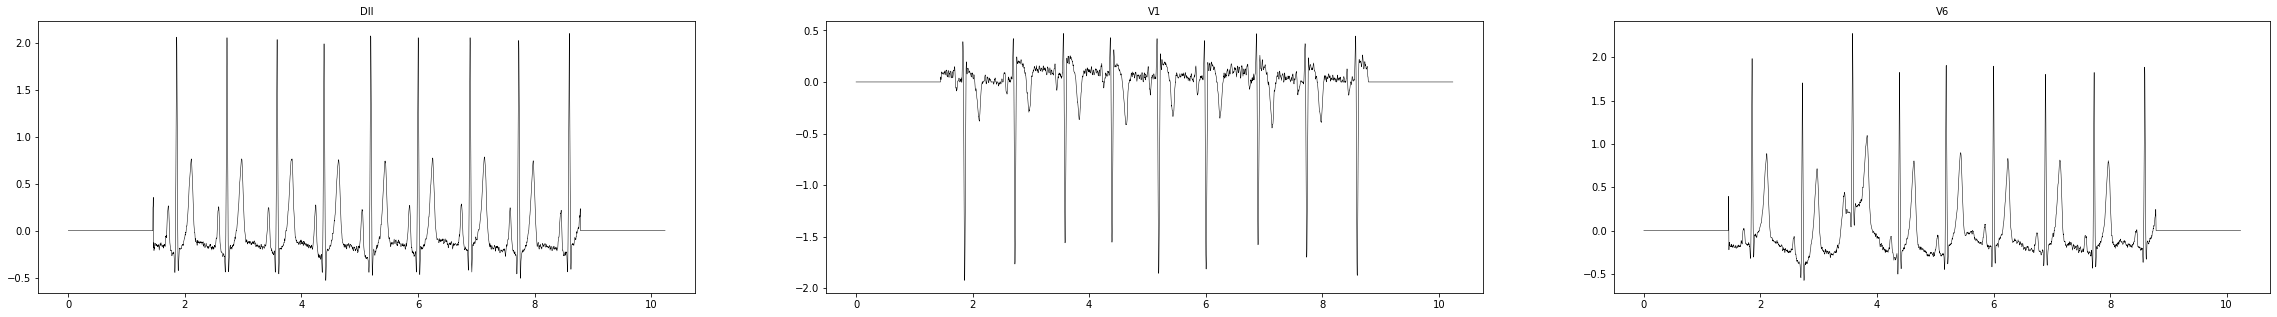

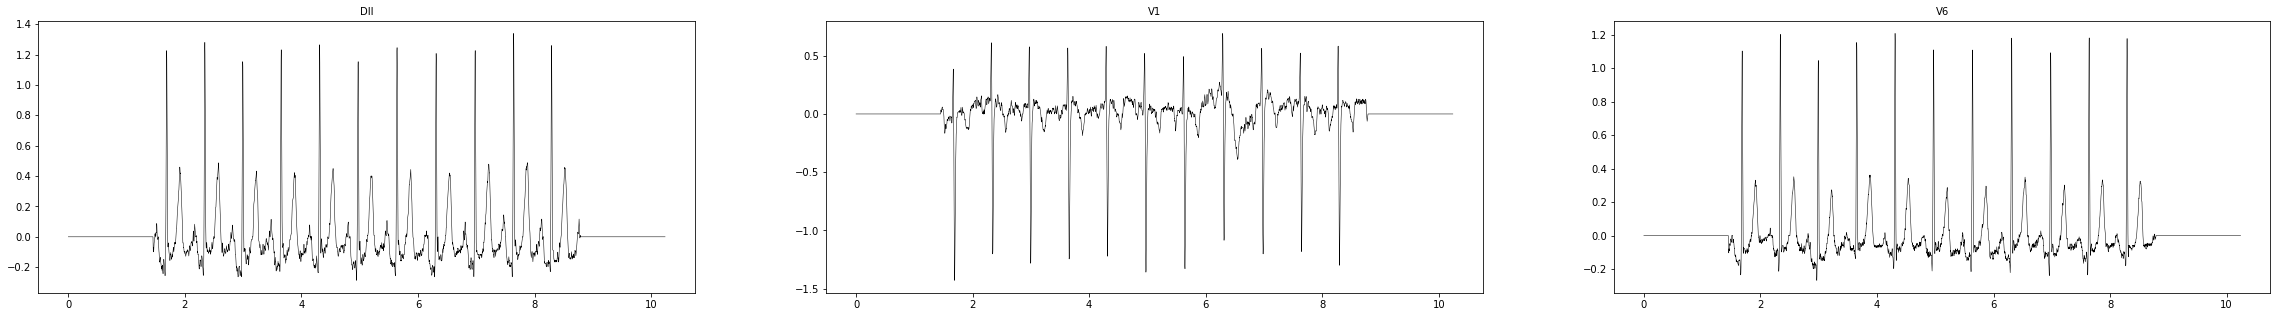

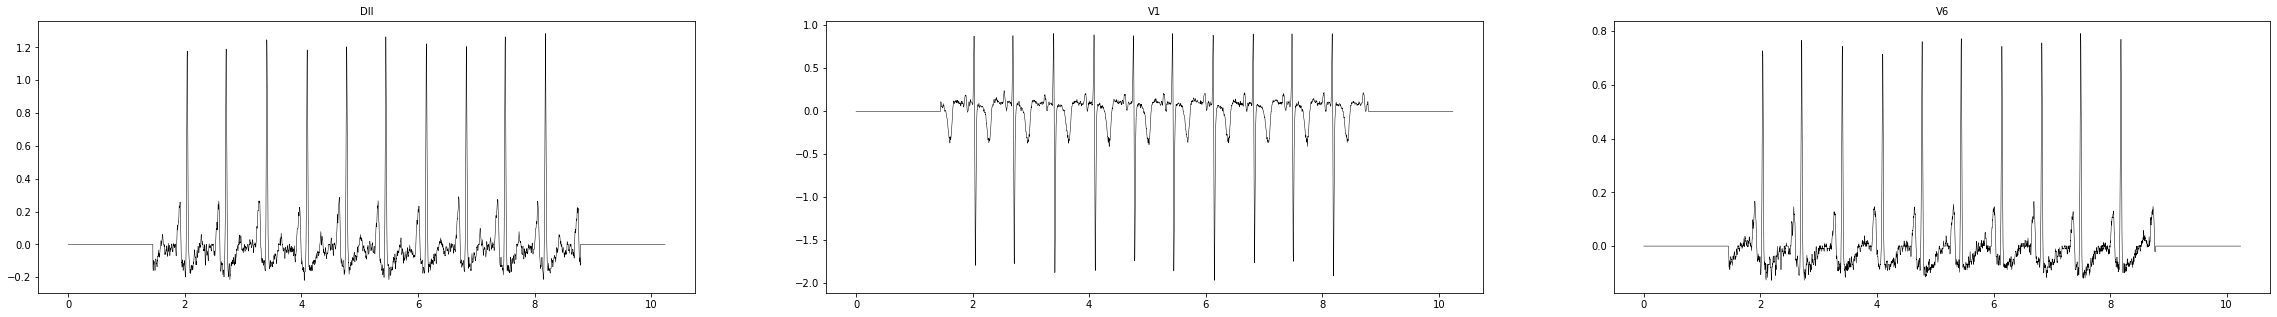



###########	 1dAVb	###########

1dAVb             1
RBBB              0
LBBB              0
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 12, dtype: int64
[0.19 0.   0.   0.   0.   0.  ]


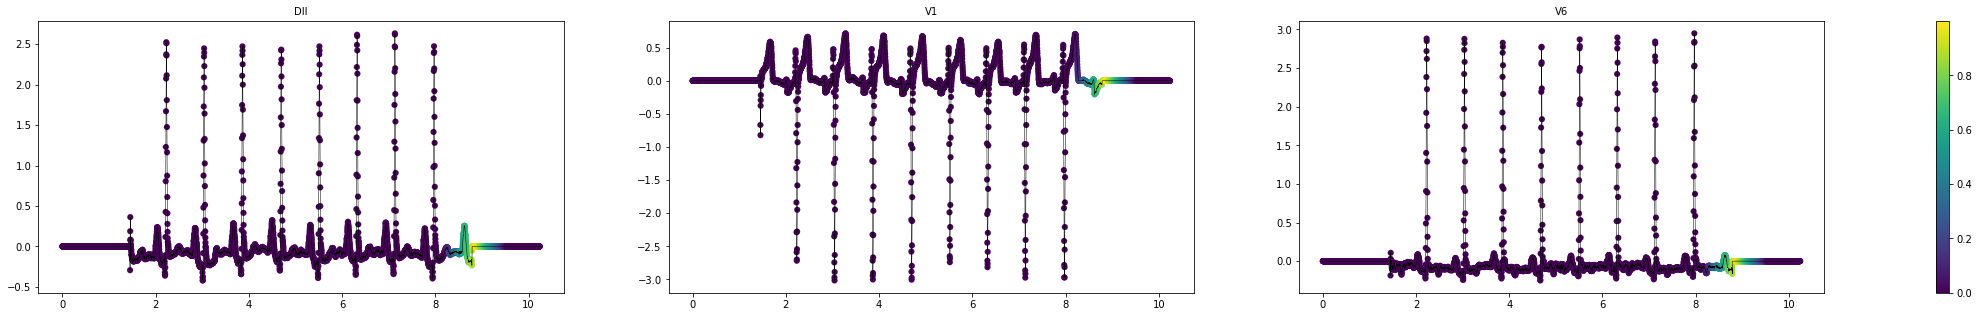

1dAVb             1
RBBB              0
LBBB              0
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 32, dtype: int64
[0.16 0.   0.   0.   0.06 0.  ]


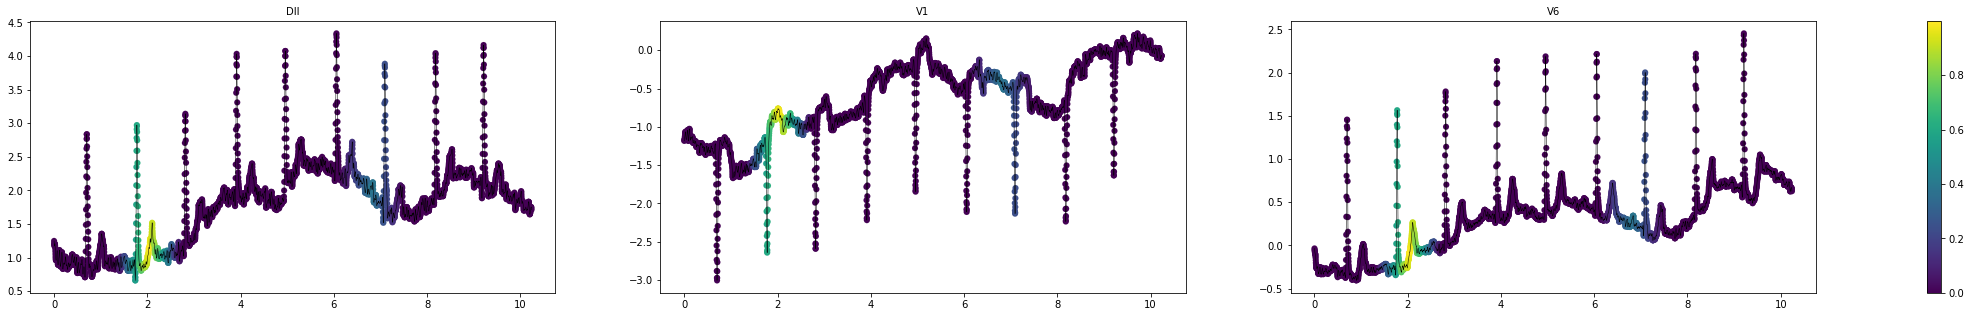

1dAVb             1
RBBB              0
LBBB              0
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 57, dtype: int64
[0.06 0.   0.   0.   0.   0.  ]


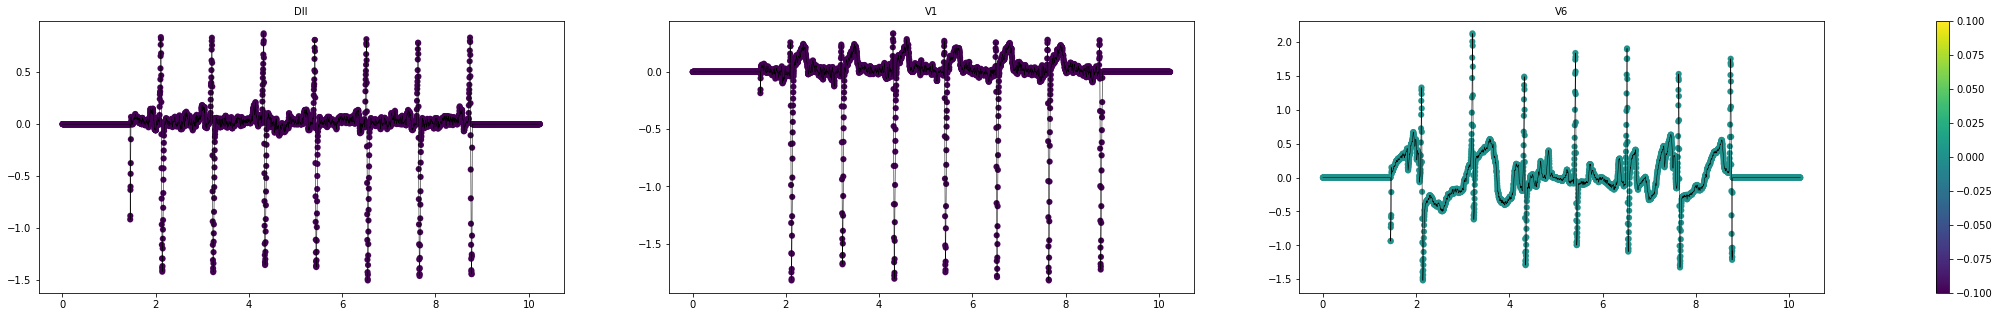



###########	 RBBB	###########

1dAVb             0
RBBB              1
LBBB              0
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 106, dtype: int64
[0.   0.79 0.   0.   0.   0.  ]


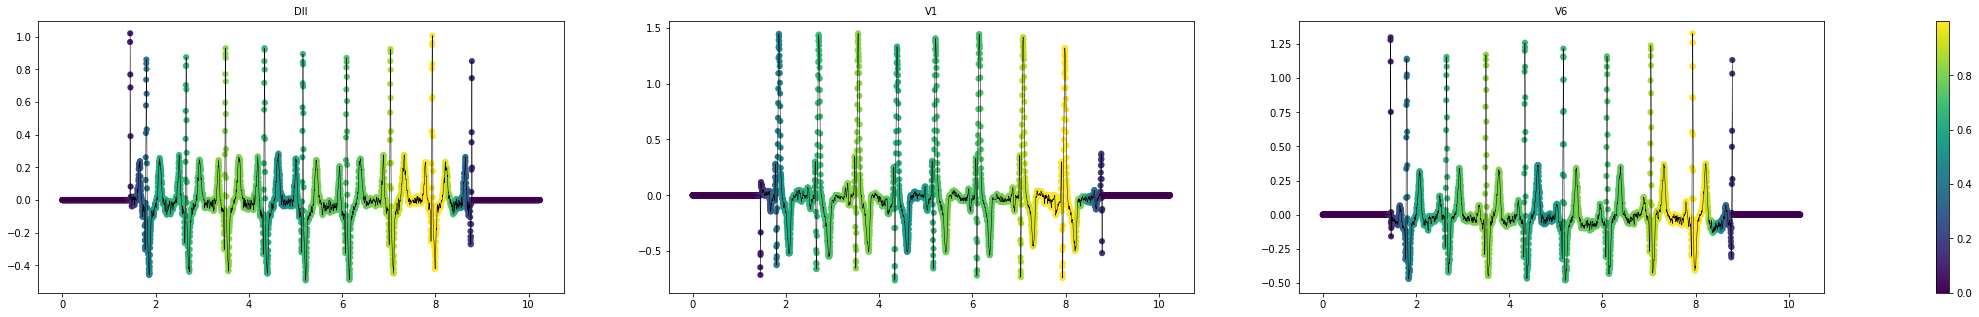

1dAVb             0
RBBB              1
LBBB              0
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 241, dtype: int64
[0.   0.43 0.   0.   0.   0.  ]


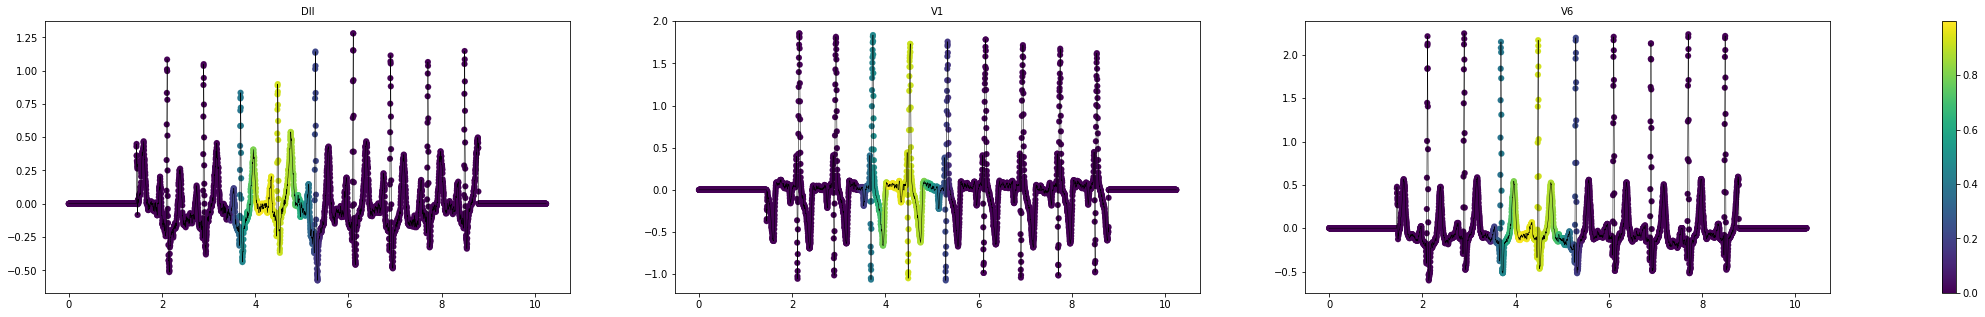

1dAVb             0
RBBB              1
LBBB              0
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 255, dtype: int64
[0.02 0.74 0.   0.   0.   0.  ]


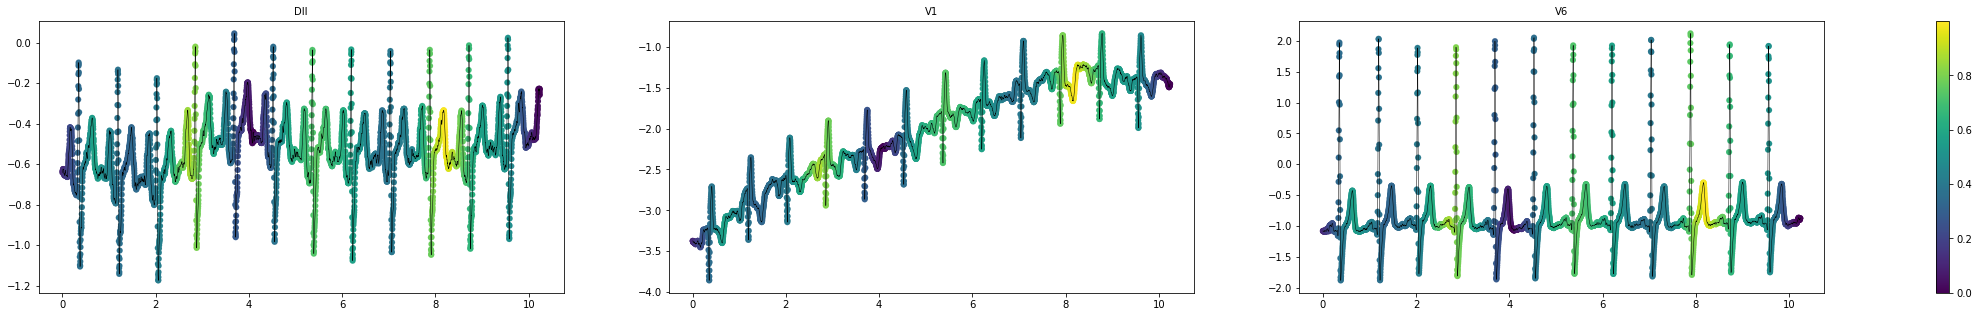



###########	 LBBB	###########

1dAVb             0
RBBB              0
LBBB              1
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 1, dtype: int64
[0.03 0.   0.32 0.   0.05 0.  ]


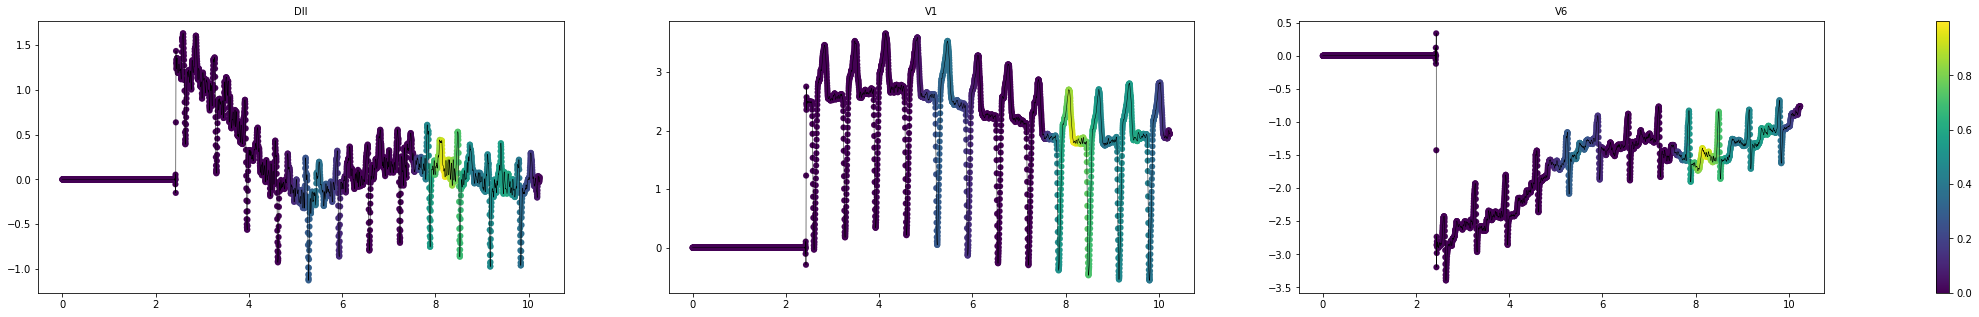

1dAVb             0
RBBB              0
LBBB              1
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 28, dtype: int64
[0.01 0.   0.84 0.   0.01 0.  ]


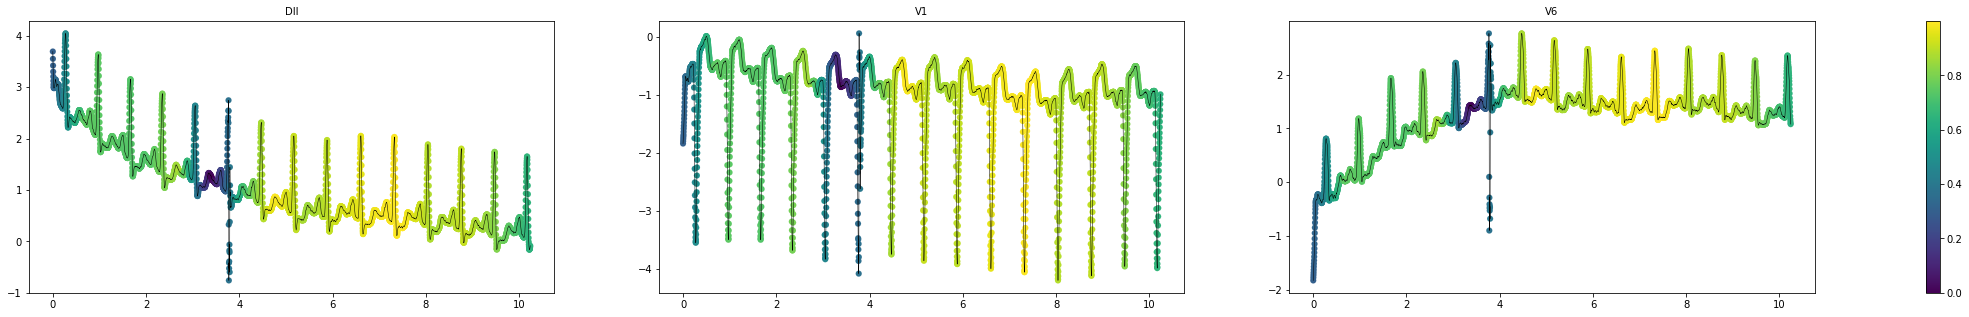

1dAVb             0
RBBB              0
LBBB              1
SB                0
AF                0
ST                0
nb_abnormality    1
Name: 58, dtype: int64
[0.   0.   0.52 0.   0.   0.  ]


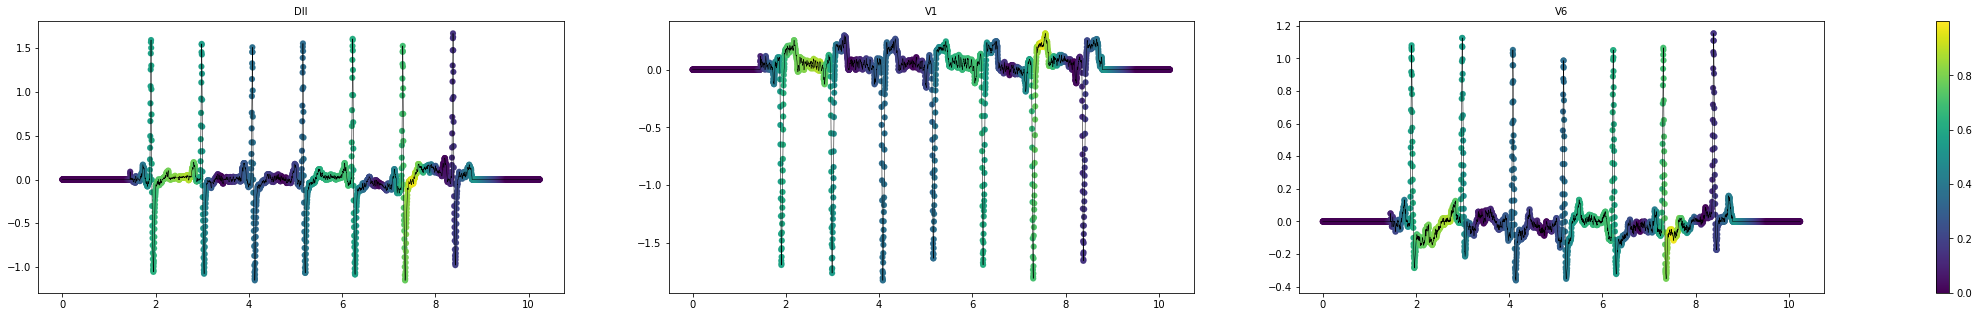



###########	 SB	###########

1dAVb             0
RBBB              0
LBBB              0
SB                1
AF                0
ST                0
nb_abnormality    1
Name: 40, dtype: int64
[0.   0.   0.   0.61 0.01 0.  ]


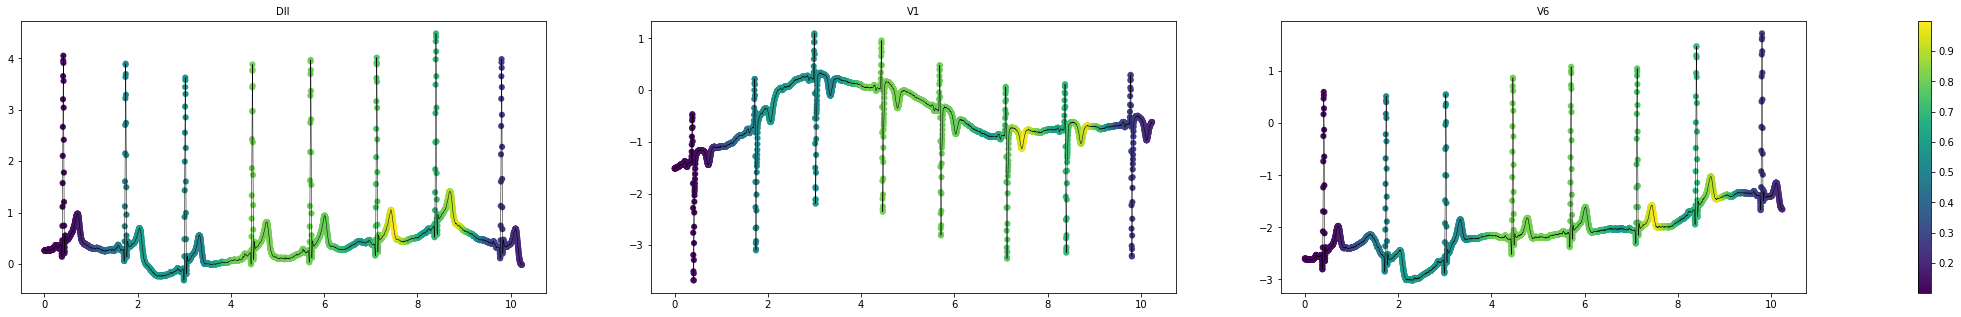

1dAVb             0
RBBB              0
LBBB              0
SB                1
AF                0
ST                0
nb_abnormality    1
Name: 75, dtype: int64
[0.01 0.01 0.   0.51 0.01 0.  ]


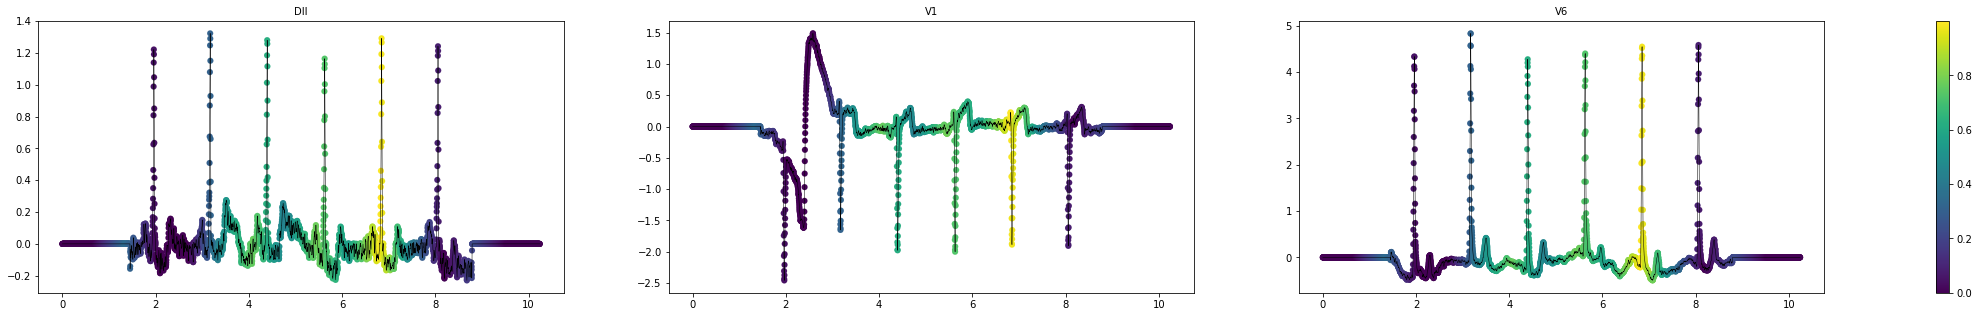

1dAVb             0
RBBB              0
LBBB              0
SB                1
AF                0
ST                0
nb_abnormality    1
Name: 98, dtype: int64
[0.   0.   0.   0.56 0.   0.  ]


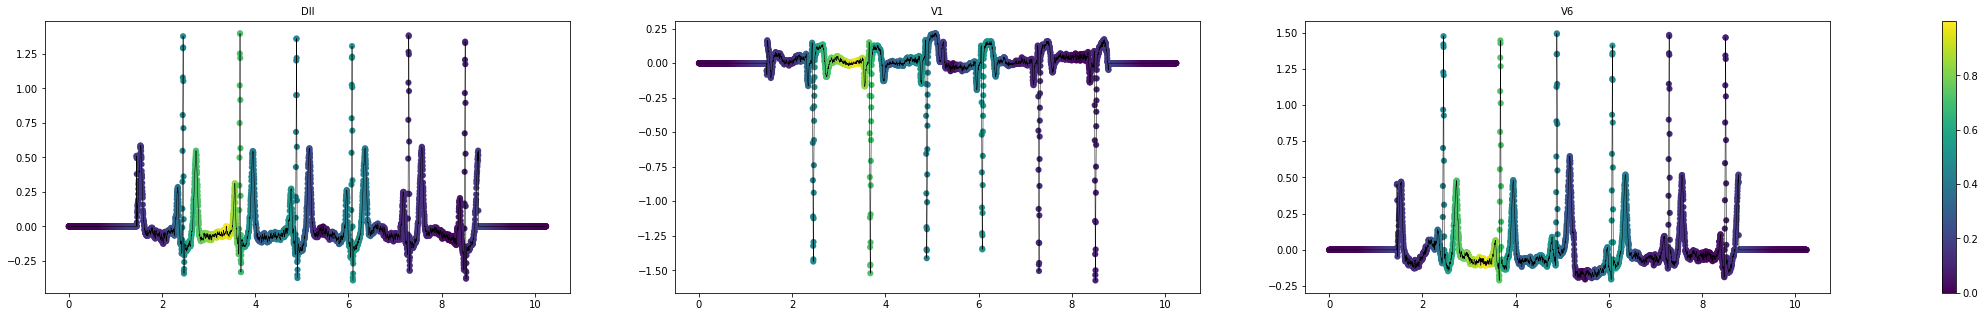



###########	 AF	###########

1dAVb             0
RBBB              0
LBBB              0
SB                0
AF                1
ST                0
nb_abnormality    1
Name: 120, dtype: int64
[0.   0.   0.   0.   0.94 0.  ]


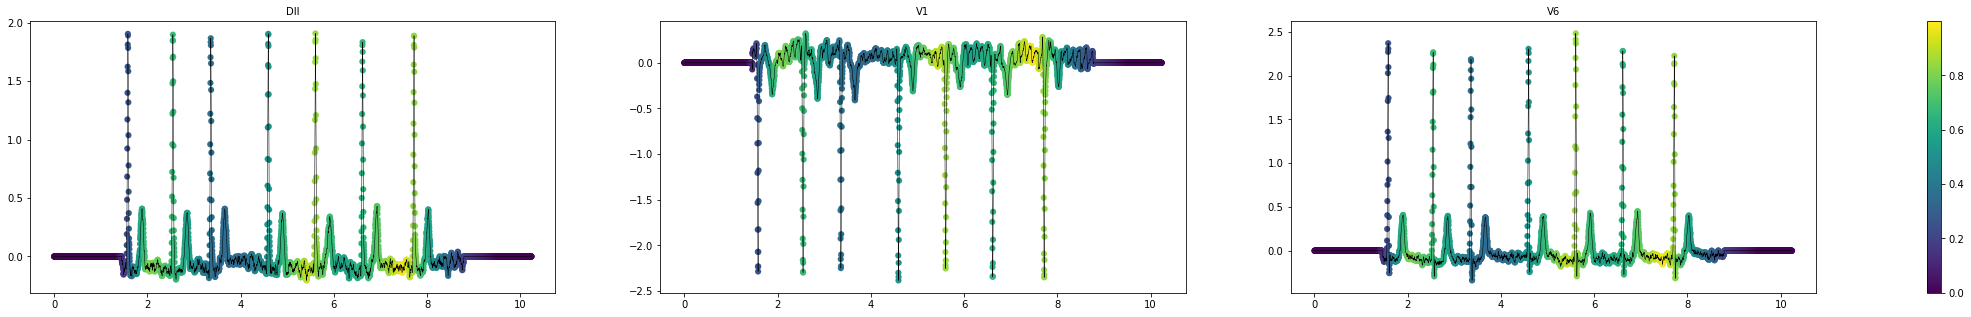

1dAVb             0
RBBB              0
LBBB              0
SB                0
AF                1
ST                0
nb_abnormality    1
Name: 170, dtype: int64
[0.04 0.   0.   0.   0.21 0.  ]


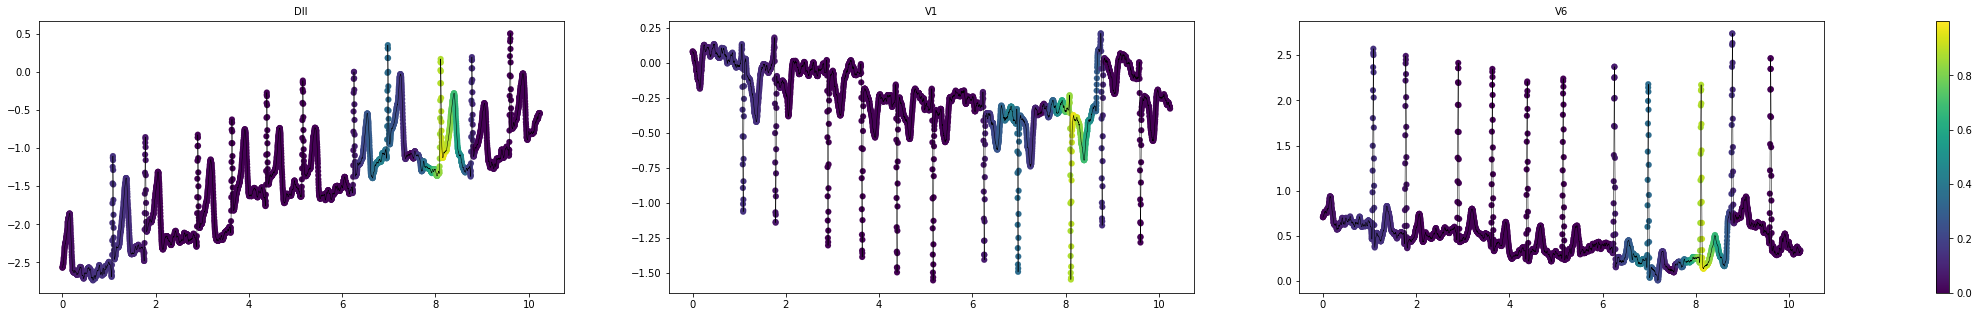

1dAVb             0
RBBB              0
LBBB              0
SB                0
AF                1
ST                0
nb_abnormality    1
Name: 259, dtype: int64
[0.   0.   0.   0.   0.93 0.  ]


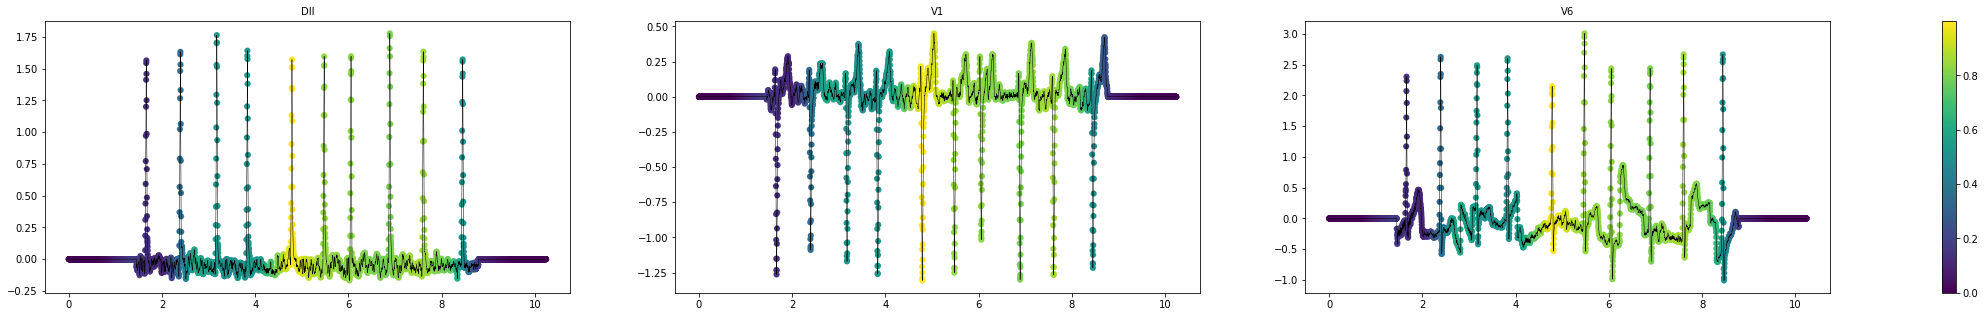



###########	 ST	###########

1dAVb             0
RBBB              0
LBBB              0
SB                0
AF                0
ST                1
nb_abnormality    1
Name: 23, dtype: int64
[0.   0.   0.   0.   0.05 0.38]


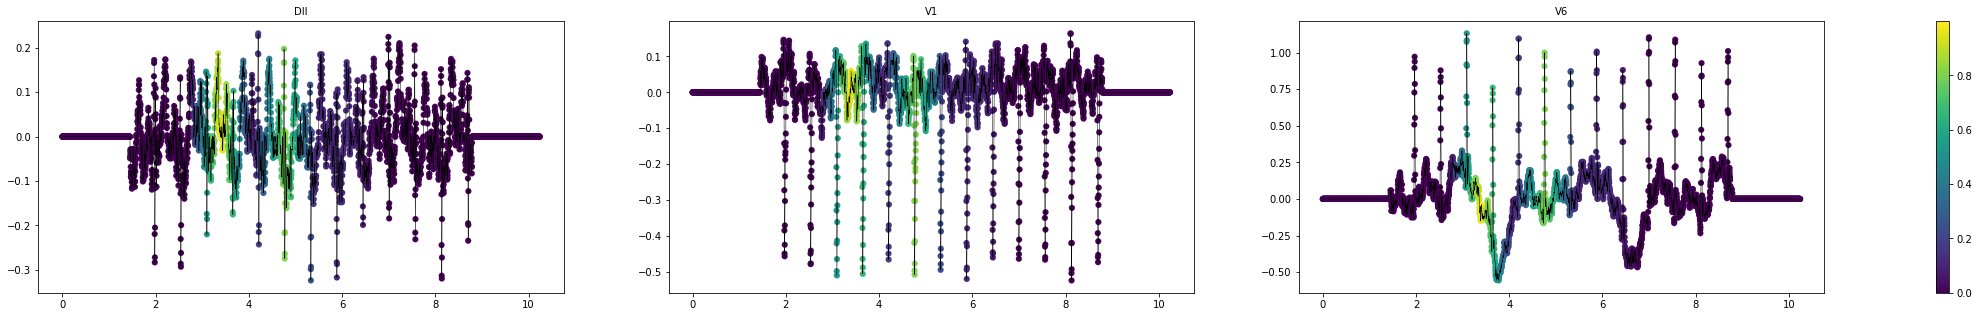

1dAVb             0
RBBB              0
LBBB              0
SB                0
AF                0
ST                1
nb_abnormality    1
Name: 33, dtype: int64
[0.   0.   0.   0.   0.   0.61]


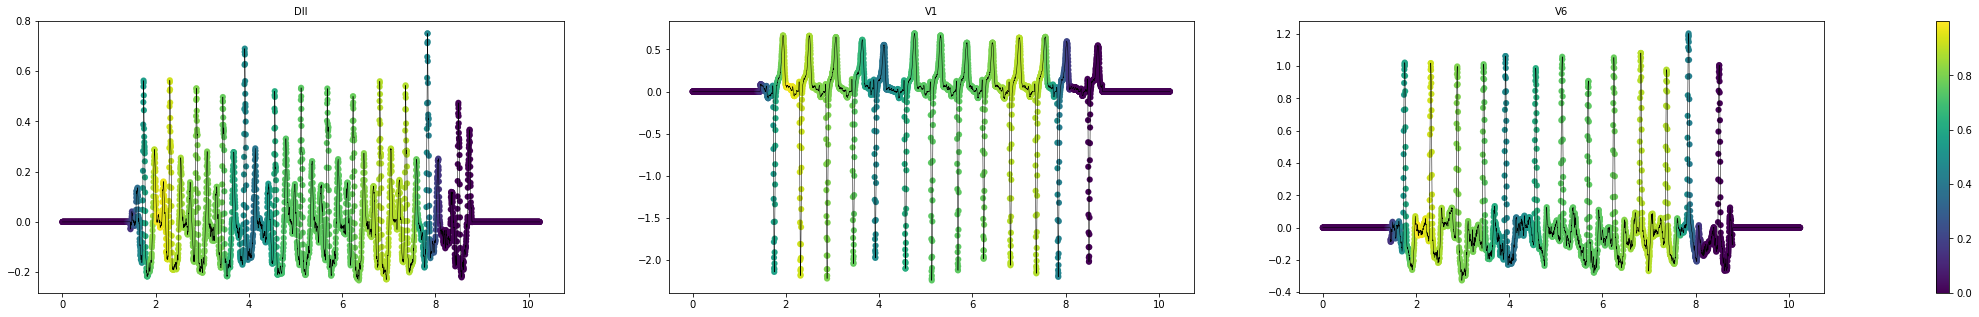

1dAVb             0
RBBB              0
LBBB              0
SB                0
AF                0
ST                1
nb_abnormality    1
Name: 69, dtype: int64
[0.   0.   0.   0.   0.   0.61]


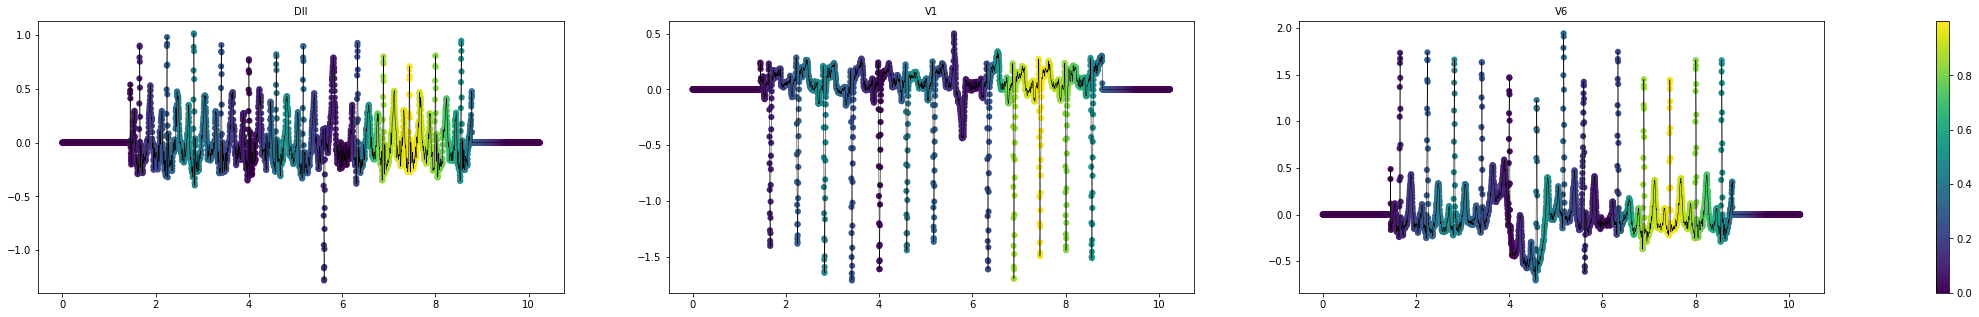

In [12]:
for idx_abn, abnormality in enumerate(df_goldStandard.columns[:-1]):
  print(abnormality,idx_abn)

# visualisation a refaire en mieux
for idx_safe in df_goldStandard[df_goldStandard.nb_abnormality==0].index[:5]:
  fig, axs = plt.subplots(1, 3,figsize=(40,5))
  for i,pos in enumerate([1,6,11]):
    ax = axs[i]
    ax.set_title(lead_order[pos],fontsize=10)
    ax.plot(np.linspace(0,10.24,4096),x[idx_safe,:,pos],'k', linewidth=.5)
  plt.show()

for idx_abn, abnormality in enumerate(df_goldStandard.columns[:-1]):
  index_abnormality = df_goldStandard[(df_goldStandard[abnormality]==1)&(df_goldStandard.nb_abnormality==1)].index
  print(f'\n\n###########\t {abnormality}\t###########\n')
  preds = model.predict(x[index_abnormality[:3]])
  for i, pos in enumerate(index_abnormality[:3]):
    np.set_printoptions(precision=2,suppress=True)
    print(df_goldStandard.iloc[pos])
    print(preds[i])
    plot_grad_cam_ecg(x[pos],check_y=idx_abn)

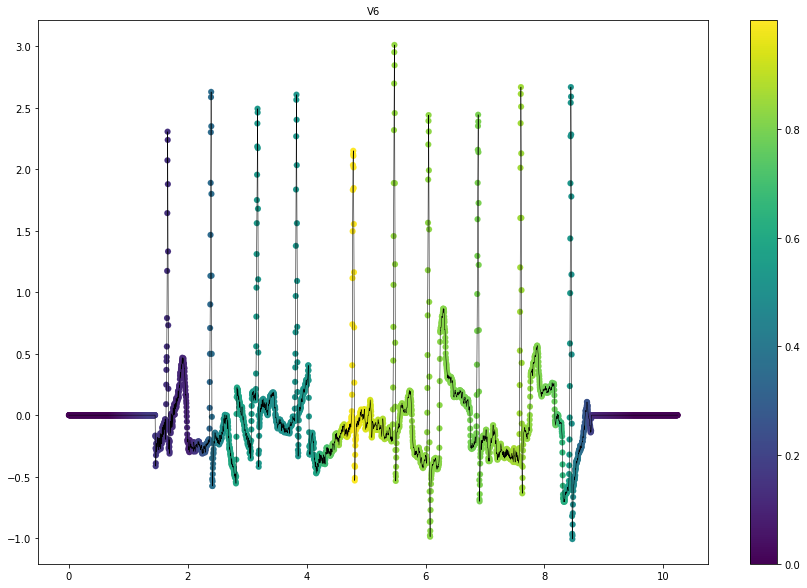

In [13]:
#Pour visualiser un ECG
pos=259
ts = x[pos]
hm = grad_cam(model, ts, 4)
hm_interp = interp1d(np.linspace(0,10.24,16), hm, kind='slinear')

fig, ax= plt.subplots(1,1,figsize=(15,10))
ax.set_title('V6',fontsize=10)
ax.plot(np.linspace(0,10.24,4096),ts[:,11],'k', linewidth=.5)
t = ax.scatter(np.linspace(0,10.24,4096),ts[:,11],linewidths=.1,c=hm_interp(np.linspace(0,10.24,4096)))
fig.colorbar(t,ax=ax)
plt.savefig('V6.png', dpi=600)

In [14]:
import h5py
import math
import pandas as pd
from tensorflow.keras.utils import Sequence
import numpy as np


class ECGSequence(Sequence):
    @classmethod
    def get_train_and_val(cls, path_to_hdf5, hdf5_dset, path_to_csv, batch_size=8, val_split=0.02):
        n_samples = len(pd.read_csv(path_to_csv))
        n_train = math.ceil(n_samples*(1-val_split))
        train_seq = cls(path_to_hdf5, hdf5_dset, path_to_csv, batch_size, end_idx=n_train)
        valid_seq = cls(path_to_hdf5, hdf5_dset, path_to_csv, batch_size, start_idx=n_train)
        return train_seq, valid_seq

    def __init__(self, path_to_hdf5, hdf5_dset, path_to_csv=None, batch_size=8,
                 start_idx=0, end_idx=None):
        if path_to_csv is None:
            self.y = None
        else:
            self.y = pd.read_csv(path_to_csv).values
        # Get tracings
        self.f = h5py.File(path_to_hdf5, "r")
        self.x = self.f[hdf5_dset]
        self.batch_size = batch_size
        if end_idx is None:
            end_idx = len(self.x)
        self.start_idx = start_idx
        self.end_idx = end_idx

    @property
    def n_classes(self):
        return self.y.shape[1]

    def __getitem__(self, idx):
        start = self.start_idx + idx * self.batch_size
        end = min(start + self.batch_size, self.end_idx)
        if self.y is None:
            return np.array(self.x[start:end, :, :])
        else:
            return np.array(self.x[start:end, :, :]), np.array(self.y[start:end])

    def __len__(self):
        return math.ceil((self.end_idx - self.start_idx) / self.batch_size)

    def __del__(self):
        self.f.close()

In [15]:
! pip install datasets

     |████████████████████████████████| 312 kB 3.2 MB/s 
     |████████████████████████████████| 67 kB 4.8 MB/s 
     |████████████████████████████████| 1.1 MB 54.4 MB/s 
     |████████████████████████████████| 212 kB 48.6 MB/s 
     |████████████████████████████████| 134 kB 58.1 MB/s 
     |████████████████████████████████| 127 kB 53.2 MB/s 
     |████████████████████████████████| 144 kB 57.4 MB/s 
     |████████████████████████████████| 271 kB 45.8 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


On recupère les prédictions à l'aide de predict.py, on aurait aussi pu directement récupérer les dnn du model.hdf5

In [16]:
import numpy as np
import warnings
import argparse
warnings.filterwarnings("ignore")
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam



if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='Get performance on test set from hdf5')
    parser.add_argument('path_to_hdf5', type=str,
                        help='path to hdf5 file containing tracings')
    parser.add_argument('path_to_model',  # or model_date_order.hdf5
                        help='file containing training model.')
    parser.add_argument('--dataset_name', type=str, default='tracings',
                        help='name of the hdf5 dataset containing tracings')
    parser.add_argument('--output_file', default="./dnn_output.npy",  # or predictions_date_order.csv
                        help='output csv file.')
    parser.add_argument('-bs', type=int, default=32,
                        help='Batch size.')

    args, unk = parser.parse_known_args([f'{path}/data/ecg_tracings.hdf5' ,f'{path}/model/model.hdf5'])
    if unk:
        warnings.warn("Unknown arguments:" + str(unk) + ".")

    # Import data
    seq = ECGSequence(args.path_to_hdf5, args.dataset_name, batch_size=args.bs)
    # Import model
    model = load_model(args.path_to_model, compile=False)
    model.compile(loss='binary_crossentropy', optimizer=Adam())
    y_score = model.predict(seq,  verbose=1)

    # Generate dataframe
    np.save(args.output_file, y_score)

    print("Output predictions saved")

26/26 [==============================] - 79s 3s/step
Output predictions saved


In [17]:
y_pred = np.round(np.load('/content/dnn_output.npy'), 4)
y_pred
# on obtient les prédictions sous forme d'un array

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.03, 0.  , 0.32, 0.  , 0.05, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.  ],
       ...,
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.17, 0.  , 0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [18]:
df_pred = pd.DataFrame(y_pred,columns=['1dAVb','RBBB','LBBB','SB','AF','ST'])

df_pred.head(15)
#On converti y_pred en un dataframe 
# les résultats obtenus sont des probabilités


1dAVb    RBBB    LBBB      SB      AF      ST
0   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
1   0.0289  0.0020  0.3178  0.0000  0.0483  0.0003
2   0.0003  0.0000  0.0000  0.0000  0.0093  0.0000
3   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
4   0.0005  0.0000  0.0000  0.0000  0.0002  0.0000
5   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
6   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
7   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
8   0.0001  0.0000  0.0000  0.0003  0.0001  0.0000
9   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
10  0.0002  0.0001  0.0000  0.0000  0.0000  0.0000
11  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
12  0.1904  0.0000  0.0000  0.0000  0.0001  0.0000
13  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
14  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000

In [19]:
df_1 = np.asarray(df_pred['1dAVb'])
df_2 = np.asarray(df_pred['RBBB'])
df_3 = np.asarray(df_pred['LBBB'])
df_4 = np.asarray(df_pred['SB'])
df_5 = np.asarray(df_pred['AF'])
df_6 = np.asarray(df_pred['ST'])

# y true, ce sont les vraies prédictions
dgs1 = np.asarray(df_goldStandard['1dAVb'])
dgs2 = np.asarray(df_goldStandard['RBBB'])
dgs3 = np.asarray(df_goldStandard['LBBB'])
dgs4 = np.asarray(df_goldStandard['SB'])
dgs5 = np.asarray(df_goldStandard['AF'])
dgs6 = np.asarray(df_goldStandard['ST'])

In [20]:
from sklearn.metrics import f1_score
def bestThresshold(dsg1,df_1):
    best_thresh = None
    best_score = 0
    for thresh in np.arange(0.1, 0.501, 0.01):
        score = f1_score(dsg1, np.array(df_1)>thresh)
        if score > best_score:
            best_thresh = thresh
            best_score = score
    return best_score , best_thresh

print(bestThresshold(dgs1, df_1))
print(bestThresshold(dgs2, df_2))
print(bestThresshold(dgs3, df_3))
print(bestThresshold(dgs4, df_4))
print(bestThresshold(dgs5, df_5))
print(bestThresshold(dgs6, df_6))


(0.8727272727272727, 0.13)
(0.9428571428571428, 0.1)
(0.983050847457627, 0.1)
(0.8571428571428572, 0.29999999999999993)
(0.8461538461538461, 0.22999999999999995)
(0.9473684210526315, 0.11)


In [21]:
# Il faut maintenant déterminer le meilleur seuil afin de trouver les résultats optimaux 
#On pourrait tester ce résultats pour plusieur seuil entre 0 et 1 mais on a le fichier dnn qui nous donne les meilleurs résultats 
#donc il est plus simple de l'utiliser

In [22]:

df_dnn = pd.read_csv(f'{path}/data/annotations/dnn.csv')

# y_pred, prédiction par le modèle de dnn 
df1 = np.asarray(df_dnn['1dAVb'])
df2 = np.asarray(df_dnn['RBBB'])
df3 = np.asarray(df_dnn['LBBB'])
df4 = np.asarray(df_dnn['SB'])
df5 = np.asarray(df_dnn['AF'])
df6 = np.asarray(df_dnn['ST'])

from sklearn.metrics import confusion_matrix, precision_recall_curve, accuracy_score




In [23]:
matrix = confusion_matrix(dgs1, df1)
print(matrix)
print('f1 scores', f1_score(dgs1, df1))
print('Le pourcentage d erreur pour l anomalie 1 est :', (((matrix[0][1] + matrix[1][0]) / 827) * 100 ) )

[[795   4]
 [  2  26]]
f1 scores 0.896551724137931
Le pourcentage d erreur pour l anomalie 1 est : 0.7255139056831923


In [24]:
acc = accuracy_score(dgs1, df1)

print (acc)

0.992744860943168


Il faudrait ensuite faire de même pour les autres anomalies

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [26]:
fp1 , tp1, ts1 = roc_curve(dgs1, df1 )
fp2 , tp2, ts2 = roc_curve(dgs2, df2 )
fp3 , tp3, ts3 = roc_curve(dgs3, df3 )
fp4 , tp4, ts4 = roc_curve(dgs4, df4 )
fp5 , tp5, ts5 = roc_curve(dgs1, df5 )
fp6 , tp6, ts6 = roc_curve(dgs1, df1 )
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

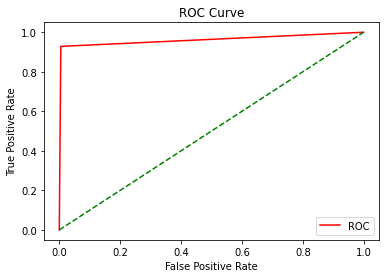

AUC pour l'anomalie 1 =0.9617825853745754


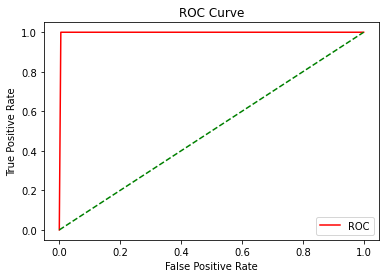

AUC pour l'anomalie 2=0.9974779319041613


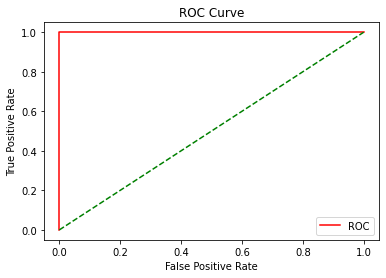

AUC pour l'anomalie 3=1.0


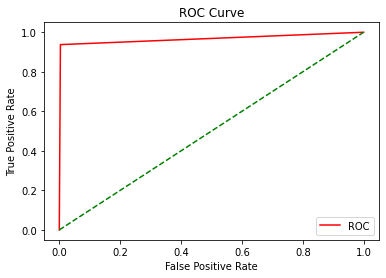

AUC pour l'anomalie 4=0.9669004315659679


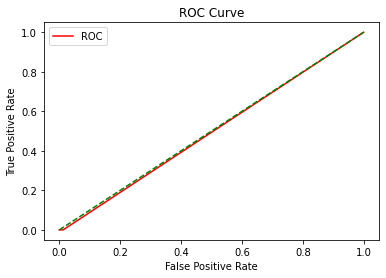

AUC pour l'anomalie 5=0.8846153846153846


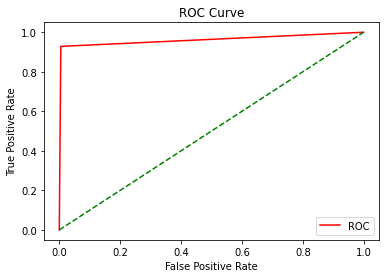

AUC pour l'anomalie 6 =0.9852206637016764


In [27]:
plot_roc_curve(fp1, tp1)
print("AUC pour l'anomalie 1 =" +str (roc_auc_score(dgs1, df1)))
plot_roc_curve(fp2, tp2)
print("AUC pour l'anomalie 2=" +str (roc_auc_score(dgs2, df2)))
plot_roc_curve(fp3, tp3)
print("AUC pour l'anomalie 3=" +str (roc_auc_score(dgs3, df3)))
plot_roc_curve(fp4, tp4)
print("AUC pour l'anomalie 4=" +str (roc_auc_score(dgs4, df4)))
plot_roc_curve(fp5, tp5)
print("AUC pour l'anomalie 5=" +str (roc_auc_score(dgs5, df5)))
plot_roc_curve(fp6, tp6)
print("AUC pour l'anomalie 6 =" +str (roc_auc_score(dgs6, df6)))


Deuxième partie transfert learning

## 1. Convert raw datasets from hospital centers into usable variables to train our model

In [28]:
pip install wfdb

     |████████████████████████████████| 137 kB 4.1 MB/s 
     |████████████████████████████████| 11.2 MB 45.0 MB/s 
     |████████████████████████████████| 895 kB 35.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [29]:
import pandas as pd
import numpy as np
import wfdb
import ast #package typed-ast

#Print versions
print('pandas version is :', pd.__version__)
print('numpy version is :', np.__version__)
print('wfdb version is :', wfdb.__version__)

pandas version is : 1.3.5
numpy version is : 1.21.5
wfdb version is : 3.4.1


In [30]:
! unzip '/content/drive/MyDrive/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1.zip'

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records100/07000/07817_lr.dat  
  inflating: __MACOSX/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records100/07000/._07817_lr.dat  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records100/07000/07359_lr.hea  
  inflating: __MACOSX/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records100/07000/._07359_lr.hea  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records100/07000/07408_lr.hea  
  inflating: __MACOSX/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records100/07000/._07408_lr.hea  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records100/07000/07259_lr.hea  
  inflating: __MACOSX/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records1

In [32]:
from tqdm import tqdm
def load_raw_data(df, sampling_rate, path):
    data = []
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        i=0
        for f in tqdm(df.filename_hr):
            data.append(wfdb.rdsamp(path+f))
            i+=1

    data = np.array([signal for signal, meta in data])
    return data

path_ = '/content/drive/MyDrive/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'

sampling_rate=500

# load and convert annotation data
Y = pd.read_csv( path_ +'ptbxl_database.csv' , index_col='ecg_id')

Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

Y = Y[0:5000]
#On, chosit les 5000 premières valeurs pour un problème 

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path_)

# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path_+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))



# Apply diagnostic superclass

Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass

100%|██████████| 5000/5000 [30:01<00:00,  2.78it/s]


In [33]:
def delete_unk_ecg(x,y):
    y = list(y)
    x_processed,y_processed = [],[]
    for index,dis in enumerate(y):
        if dis != []:
            x_processed.append(x[index])
            y_processed.append(y[index])
    return x_processed,y_processed


X_train,y_train = delete_unk_ecg(X_train,y_train)
X_test,y_test = delete_unk_ecg(X_test,y_test)
            
y_train = np.array(y_train,dtype=object)
y_test = np.array(y_test,dtype=object)
X_train = np.array(X_train)
X_test = np.array(X_test)


In [34]:
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(4327,)
(4327, 5000, 12)
(615, 5000, 12)
(615,)


In [35]:
#Define the diseases
diseases = ["NORM","MI","HYP","CD","STTC"]

#Create a RIBEIRO format training data
def Ribeiro_convert(y_train):
    
    y_train = list(y_train)

    y_train_ = [[0,0,0,0] for i in list(y_train)]
    for index, info in enumerate(y_train):

        for disease in info:

            if disease != 'NORM':
                y_train_[index][diseases.index(disease)-1] = 1

    y_train_ = np.array(y_train_)
    return y_train_

y_train = Ribeiro_convert(y_train)
y_test = Ribeiro_convert(y_test)

print(y_train.shape)
print(y_test.shape)


##Reformat the ECG aquisition, 4048 samples needed.

(4327, 4)
(615, 4)


In [36]:
import cv2 # opencv
from tqdm import tqdm

def convert_X(X,scale):
    X_conv = np.empty((X.shape[0], 4096, 12))
    for index,array in enumerate(X):
        array = cv2.resize(array,(12,scale))
        X_conv[index,:,:]=array
    return X_conv
    
X_train_=convert_X(X_train,4096)    
X_test_=convert_X(X_test,4096)    

print(X_train.shape)
print(X_train_.shape)
print(X_test.shape)
print(X_test_.shape)

(4327, 5000, 12)
(4327, 4096, 12)
(615, 5000, 12)
(615, 4096, 12)


y= [1 0 0 0]
Disease = MI


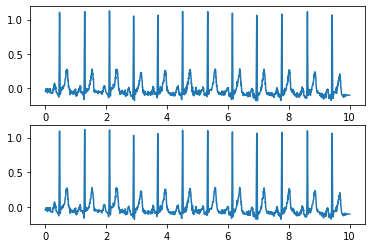

In [37]:
import numpy as np
import matplotlib.pyplot as plt


y = np.linspace(0,10,5000)
y_ =np.linspace(0,10,4096)


ObsID=7     #you can change the obsevations here
ChannelID=0 #you can change the channel here

plt.subplot(2, 1, 1)
plt.plot(y,X_train[ObsID,:,ChannelID])
plt.subplot(2, 1, 2)
plt.plot(y_,X_train_[ObsID,:,ChannelID])

print('y=',y_train[ObsID])

if (y_train[ObsID][0]==1):
    print("Disease = MI")
elif (y_train[ObsID][1]==1):
    print("Disease = HYP")
elif (y_train[ObsID][2]==1):
    print("Disease = CD")
elif (y_train[ObsID][3]==1):
    print("Disease = STTC")


# On effectue le transfert learning

In [38]:
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from keras import Model


In [39]:
model_ = load_model(f"/content/drive/MyDrive/model/model.hdf5", compile=False) #on recupère le modèle 

model_.trainable = False #on gêle les couches

model1 = model_.layers[:-1][-1].output

modeltl = Dense(4096,activation='relu', trainable=True)(model1) #dernière couche du réseau modeltl est le modèle du transfert learning
modeltl = Dense(4,activation='sigmoid', trainable=True)(modeltl)

Modele = Model(inputs=model_.input, outputs=modeltl)

Modele.summary()

# On modifie les deux dernières couches car à la sortie on veut que 4 paramètre et non 6 ( c'est le but du transfert learning 
# modifier un réseau pour l'entrainer sur des nouvelles données )

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 signal (InputLayer)            [(None, 4096, 12)]   0           []                               
                                                                                                  
 conv1d_1 (Conv1D)              (None, 4096, 64)     12288       ['signal[0][0]']                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 4096, 64)    256         ['conv1d_1[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_1 (Activation)      (None, 4096, 64)     0           ['batch_normalization_1[0]

In [41]:
#On va maintenant compiler le nouveau réseau en choisissant les epochs et le batch_size

Modele.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Modele.fit(X_train_, y_train , epochs = 12 ,  batch_size = 50 )

Epoch 1/12
87/87 [==============================] - 343s 4s/step - loss: 0.4119 - accuracy: 0.2265
Epoch 2/12
87/87 [==============================] - 334s 4s/step - loss: 0.4101 - accuracy: 0.2237
Epoch 3/12
87/87 [==============================] - 330s 4s/step - loss: 0.4070 - accuracy: 0.1962
Epoch 4/12
87/87 [==============================] - 329s 4s/step - loss: 0.3988 - accuracy: 0.2133
Epoch 5/12
87/87 [==============================] - 328s 4s/step - loss: 0.3982 - accuracy: 0.2008
Epoch 6/12
87/87 [==============================] - 329s 4s/step - loss: 0.3988 - accuracy: 0.2066
Epoch 7/12
87/87 [==============================] - 331s 4s/step - loss: 0.3923 - accuracy: 0.2043
Epoch 8/12
87/87 [==============================] - 329s 4s/step - loss: 0.3939 - accuracy: 0.2142
Epoch 9/12
87/87 [==============================] - 334s 4s/step - loss: 0.3905 - accuracy: 0.2193
Epoch 10/12
87/87 [==============================] - 331s 4s/step - loss: 0.3909 - accuracy: 0.2475
Epoch 11/

In [44]:
y_pred1 = Modele.predict(X_test_)
y_pred1

array([[0.08, 0.04, 0.07, 0.16],
       [0.07, 0.04, 0.18, 0.09],
       [0.28, 0.18, 0.46, 0.25],
       ...,
       [0.44, 0.23, 0.71, 0.37],
       [0.4 , 0.26, 0.94, 0.34],
       [0.07, 0.03, 0.07, 0.15]], dtype=float32)

In [47]:
df_pred1=pd.DataFrame(data = y_pred1, columns = ["MI","HYP","CD","STTC"])
df_pred1

MI       HYP        CD      STTC
0    0.083069  0.043402  0.069560  0.155230
1    0.066456  0.036940  0.182299  0.085913
2    0.284424  0.176563  0.462360  0.251885
3    0.072940  0.065778  0.091495  0.125866
4    0.096944  0.076551  0.134583  0.169966
..        ...       ...       ...       ...
610  0.100978  0.063901  0.117564  0.167376
611  0.115858  0.102199  0.117394  0.085607
612  0.440240  0.231791  0.710079  0.374530
613  0.403460  0.261747  0.940410  0.336306
614  0.069105  0.033876  0.068812  0.148221

[615 rows x 4 columns]

In [48]:
df_test1=pd.DataFrame(data = y_test, columns = ["MI","HYP","CD","STTC"])
df_test1

MI  HYP  CD  STTC
0     0    0   0     0
1     0    0   0     0
2     0    0   0     0
3     0    0   0     0
4     0    0   0     0
..   ..  ...  ..   ...
610   0    0   0     0
611   0    0   0     0
612   0    0   0     1
613   0    1   1     1
614   0    0   0     0

[615 rows x 4 columns]

In [50]:
pred1 = np.asarray(df_pred1['MI'])
pred2 = np.asarray(df_pred1['HYP'])
pred3 = np.asarray(df_pred1['CD'])
pred4 = np.asarray(df_pred1['STTC'])




test1 = np.asarray(df_test1['MI'])
test2 = np.asarray(df_test1['HYP'])
test3 = np.asarray(df_test1['CD'])
test4 = np.asarray(df_test1['STTC'])


In [51]:

from sklearn.metrics import f1_score
def bestThresshold(dsg1,df_1):
    best_thresh = None
    best_score = 0
    for thresh in np.arange(0.1, 0.501, 0.01):
        score = f1_score(dsg1, np.array(df_1)>thresh)
        if score > best_score:
            best_thresh = thresh
            best_score = score
    return best_score , best_thresh

print(bestThresshold(test1, pred1))
print(bestThresshold(test2, pred2))
print(bestThresshold(test3, pred3))
print(bestThresshold(test4, pred4))

(0.506578947368421, 0.20999999999999996)
(0.37398373983739835, 0.12)
(0.5596330275229358, 0.32999999999999985)
(0.5722379603399433, 0.20999999999999996)


In [55]:
#ON Choisit alors un seuil de 0.25
y_pred1 = Modele.predict(X_test_)
yprd = np.copy(y_pred1)
yprd[yprd > 0.25] = 1
yprd[yprd < 0.25] = 0

In [56]:
yprd # c'est le y_pred avec les bonnes probabilités et un seuil déterminé à l'aide de la fonction best-threshold

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 1., 1.],
       ...,
       [1., 0., 1., 1.],
       [1., 1., 1., 1.],
       [0., 0., 0., 0.]], dtype=float32)

In [57]:
df_predf=pd.DataFrame(data = yprd, columns = ["MI","HYP","CD","STTC"])
df_predf

MI  HYP   CD  STTC
0    0.0  0.0  0.0   0.0
1    0.0  0.0  0.0   0.0
2    1.0  0.0  1.0   1.0
3    0.0  0.0  0.0   0.0
4    0.0  0.0  0.0   0.0
..   ...  ...  ...   ...
610  0.0  0.0  0.0   0.0
611  0.0  0.0  0.0   0.0
612  1.0  0.0  1.0   1.0
613  1.0  1.0  1.0   1.0
614  0.0  0.0  0.0   0.0

[615 rows x 4 columns]

In [59]:
y_predf1 = np.asarray(df_predf['MI'])
y_predf2 = np.asarray(df_predf['HYP'])
y_predf3 = np.asarray(df_predf['CD'])
y_predf4 = np.asarray(df_predf['STTC'])



y_test1 = np.asarray(df_test1['MI'])
y_test2 = np.asarray(df_test1['HYP'])
y_test3 = np.asarray(df_test1['CD'])
y_test4 = np.asarray(df_test1['STTC'])


##**MI**

In [66]:
#Maintenant évaluont la performance du modèle à l 'aide de la matrice de confusion
#Pour MI On les résultats ci-dessous
matrix = confusion_matrix(y_test1, y_predf1)
print(matrix)
print('f1 scores', f1_score(y_test1, y_predf1))
print('Le pourcentage d erreur pour l anomalie  est :', (((matrix[0][1] + matrix[1][0]) / 827) * 100 ) )

[[409  78]
 [ 63  65]]
f1 scores 0.4797047970479704
Le pourcentage d erreur pour l anomalie  est : 17.04957678355502


## **HYP**

In [67]:
matrix = confusion_matrix(y_test2, y_predf2)
print(matrix)
print('f1 scores', f1_score(y_test2, y_predf2))
print('Le pourcentage d erreur pour l anomalie  est :', (((matrix[0][1] + matrix[1][0]) / 827) * 100 ) )

[[523  21]
 [ 61  10]]
f1 scores 0.19607843137254904
Le pourcentage d erreur pour l anomalie  est : 9.915356711003627


## **CD**

In [68]:
matrix = confusion_matrix(y_test3, y_predf3)
print(matrix)
print('f1 scores', f1_score(y_test3, y_predf3))
print('Le pourcentage d erreur pour l anomalie  est :', (((matrix[0][1] + matrix[1][0]) / 827) * 100 ) )

[[434  65]
 [ 51  65]]
f1 scores 0.5284552845528455
Le pourcentage d erreur pour l anomalie  est : 14.026602176541717


## **STTC**

In [69]:
matrix = confusion_matrix(y_test4, y_predf4)
print(matrix)
print('f1 scores', f1_score(y_test4, y_predf4))
print('Le pourcentage d erreur pour l anomalie  est :', (((matrix[0][1] + matrix[1][0]) / 827) * 100 ) )

[[385  90]
 [ 58  82]]
f1 scores 0.5256410256410257
Le pourcentage d erreur pour l anomalie  est : 17.89600967351874


On peut très bien construire un simple classifier tel que le SVC, mais la matrice de confusion nous permet déja de tirer des conclusions à savoir que le modèle pré entrainé ne fonctionne pas bien sur les nouvelles données et quil faudra modifier encore plus certaines couches du réseau de neurones afin d'en tirer le meilleur. On aurait aussi pu ne pas gêler les couches afin que les poids soient modifiés et que le réseau apprenne mieux lors de la backpropagation. 

In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [71]:
fp1 , tp1, ts1 = roc_curve(y_test1, y_predf1 )
fp2 , tp2, ts2 = roc_curve(y_test2, y_predf2)
fp3 , tp3, ts3 = roc_curve(y_test3, y_predf3 )
fp4 , tp4, ts4 = roc_curve(y_test4, y_predf4 )

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

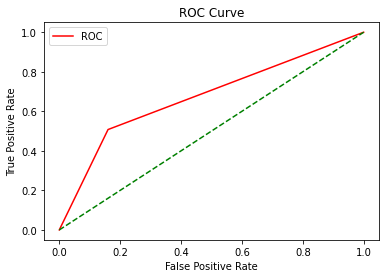

AUC pour l'anomalie 1 =0.673824114476386


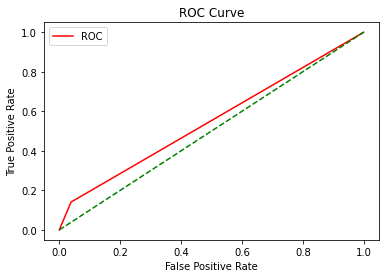

AUC pour l'anomalie 2=0.5511210646230323


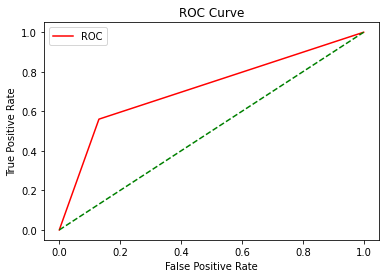

AUC pour l'anomalie 3=0.7150421532720613


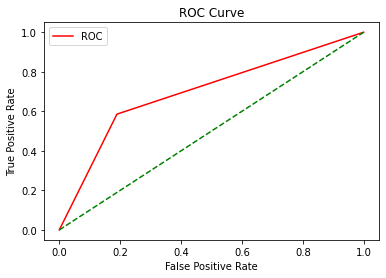

AUC pour l'anomalie 4=0.6981203007518797


In [72]:
plot_roc_curve(fp1, tp1)
print("AUC pour l'anomalie 1 =" +str (roc_auc_score(y_test1, y_predf1)))
plot_roc_curve(fp2, tp2)
print("AUC pour l'anomalie 2=" +str (roc_auc_score(y_test2, y_predf2)))
plot_roc_curve(fp3, tp3)
print("AUC pour l'anomalie 3=" +str (roc_auc_score(y_test3, y_predf3)))
plot_roc_curve(fp4, tp4)
print("AUC pour l'anomalie 4=" +str (roc_auc_score(y_test4, y_predf4)))



On remarque que les AUC sont presque toutes faibles et ne sont pas proche de 1. Ce qui montre à nouveau que le modèle ne prédit pas bien sur les nouvelles données